In [72]:
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff

In [73]:
# import numpy as np
# from skimage import transform, util
# from PIL import Image

# # Load the original images and masks
# images = []
# masks = []
# aug_masks = []
# # for i in range(1, 31):
# #     image = Image.open(f"./PhC-C2DH-U373/aug/ori/imaging ({i}).tif")
# #     mask = Image.open(f"./PhC-C2DH-U373/aug/ori/segmentation ({i}).tif")
# #     # resize image
# #     image = image.resize((512, 512))
# #     mask = mask.resize((512, 512))
# #     images.append(np.array(image))
# #     masks.append(np.array(mask))


# for i in range(1, 20):
#     image = Image.open(f"./PhC-C2DH-U373/img/02 ({i}).tif")
#     mask = Image.open(f"./PhC-C2DH-U373/mask/02 ({i}).tif")
#     # resize image
#     image = image.resize((512, 512))
#     mask = mask.resize((512, 512))
#     images.append(np.array(image))
#     masks.append(np.array(mask))

# print(len(images))
# print(np.unique(masks))

# # Define the data augmentation transformations
# # dont change the masks classes 
# augmentations = [
#     # transform.flip,
#     transform.rotate,
#     # transform.rescale,
#     # transform.crop,
#     # util.random_noise
# ]


# # for every image and mask, rotate it 90, 180, 270 degrees
# # for i in range(len(images)):
# #     image = images[i]
# #     mask = masks[i]
# #     for j in range(3):
# #         aug_image = transform.rotate(image, (j+1) * 90, preserve_range=True, order=0)
# #         aug_mask = transform.rotate(mask, (j+1) * 90, preserve_range=True, order=0)
# #         images.append(aug_image)
# #         masks.append(aug_mask)

# print(len(images))

# # save the augmented images and masks
# # for i in range(len(images)):
# #     Image.fromarray(images[i]).save(f"./PhC-C2DH-U373/aug/img/augmented_image_{i}.tif")
# #     Image.fromarray(masks[i]).save(f"./PhC-C2DH-U373/aug/mask/augmented_mask_{i}.tif")

# # Apply data augmentation to generate 200 new images and masks
# for i in range(100):
#     # Randomly select an image and mask from the original set
#     idx = np.random.randint(len(images))
#     image = images[idx]
#     mask = masks[idx]

#     # Apply a random data augmentation transformation to the image and mask
#     aug_idx = np.random.randint(len(augmentations))
#     aug_fn = augmentations[aug_idx]
#     # image = aug_fn(image)
#     # mask = aug_fn(mask)
#     if aug_idx == 0:
#         image = aug_fn(image, np.random.randint(1, 4) * 90, preserve_range=True, order=0)
#         mask = aug_fn(mask, np.random.randint(1, 4) * 90, preserve_range=True, order=0)
#     # elif aug_idx == 1:
#     #     image = aug_fn(image, np.random.uniform(0.5, 1.5), preserve_range=True, order=0)
#     #     mask = aug_fn(mask, np.random.uniform(0.5, 1.5), preserve_range=True, order=0)
#     # elif aug_idx == 2:
#     #     image = aug_fn(image, var=np.random.uniform(0, 0.1))
#     #     mask = aug_fn(mask, var=np.random.uniform(0, 0.1))
    
# #     aug_masks.append(mask)
# #     # Save the new image and mask to file
# #     # Image.fromarray(image).save(f"./PhC-C2DH-U373/aug/img/augmented_image_{i}.tif")
# #     # Image.fromarray(mask).save(f"./PhC-C2DH-U373/aug/mask/augmented_mask_{i}.tif")

# print(len(np.unique(masks)))

In [74]:
#Resizing images, if needed
SIZE_X = 256
SIZE_Y = 256
n_classes = 2 #Number of classes for segmentation
num_images = 200  #Total 1600 available

In [75]:
image_names = glob.glob("./PhC-C2DH-U373/aug/*.png")
print(len(image_names))
image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 0) for image in image_names_subset]
# resize images
images = [cv2.resize(image, (SIZE_X, SIZE_Y)) for image in images]

# # read tiff images
# images = tiff.imread("./sandstone_data_for_ML/data_for_3D_Unet/train_images_256_256_256.tif")
# # sort images by name
# images.sort()

# select first 200 images
images = images[0:num_images]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
print(image_dataset.shape)

30
(30, 256, 256, 1)


In [76]:
image_names = glob.glob("./PhC-C2DH-U373/label/*.png")
image_names.sort()
image_names_subset = image_names[0:num_images]
mask = [cv2.imread(image, 0) for image in image_names_subset]
# resize images
mask = [cv2.resize(image, (SIZE_X, SIZE_Y)) for image in mask]
# read tiff images
# mask = tiff.imread("./sandstone_data_for_ML/data_for_3D_Unet/train_masks_256_256_256.tif")

# mask.sort()
mask_subset = mask[0:num_images]

mask_dataset = np.array(mask_subset)

# first normalize the mask
mask_dataset = mask_dataset / 255
# then devide the mask into 2 classes
mask_dataset[mask_dataset > 0.5] = 1
mask_dataset[mask_dataset <= 0.5] = 0

# mask_dataset = np.expand_dims(mask_dataset, axis = 3)
print(mask_dataset.shape)


(30, 256, 256)


In [77]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", len(np.unique(mask_dataset)))

Image data shape is:  (30, 256, 256, 1)
Mask data shape is:  (30, 256, 256)
Max pixel value in image is:  255
Labels in the mask are :  2


In [78]:
# # data augmentation
# import elasticdeform
# sigma = 30  # the standard deviation of the Gaussian filter
# alpha = 50  # the intensity of the deformation
# deformed_image = elasticdeform.deform_grid(image_dataset, sigma=sigma, alpha=alpha)


In [79]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dataset.shape  
mask_dataset_reshaped = mask_dataset.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
mask_dataset_encoded = mask_dataset_reshaped_encoded.reshape(n, h, w)

np.unique(mask_dataset_encoded)

array([0, 1], dtype=int64)

In [80]:
mask_dataset_encoded = np.expand_dims(mask_dataset_encoded, axis = 3)
print(mask_dataset_encoded.shape)

(30, 256, 256, 1)


In [81]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler

In [82]:
#Split training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset_encoded, test_size = 0.2, random_state = 42)

In [83]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))



In [84]:
print(y_train_cat.shape)

(24, 256, 256, 2)


In [85]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [86]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)

(256, 256, 1)


In [87]:
model = build_unet(input_shape, n_classes=n_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

softmax
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 64  640         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_36 (BatchN  (None, 256, 256, 64  256        ['conv2d_38[0][0]']              
 ormalization)                  )                                                     

In [88]:
history = model.fit(X_train, y_train_cat, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=5, 
                    validation_data=(X_test, y_test_cat), 
                    shuffle=False)

Epoch 1/5
2/2 [==============================] - 123s 58s/step - loss: 0.8062 - accuracy: 0.4735 - val_loss: 0.6783 - val_accuracy: 0.8004
Epoch 2/5


: 

: 

In [ ]:
#Save the model for future use
model.save('./saved_models/unet.hdf5')

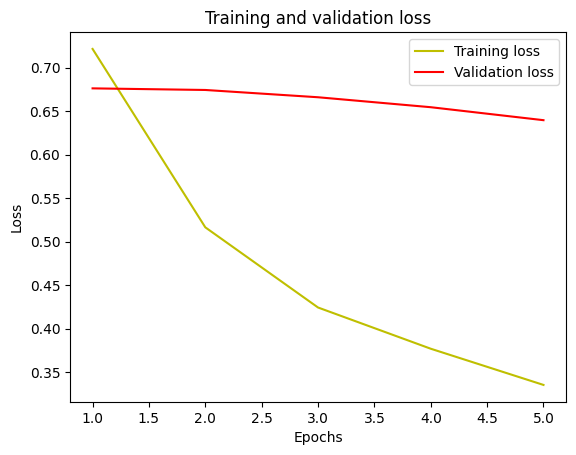

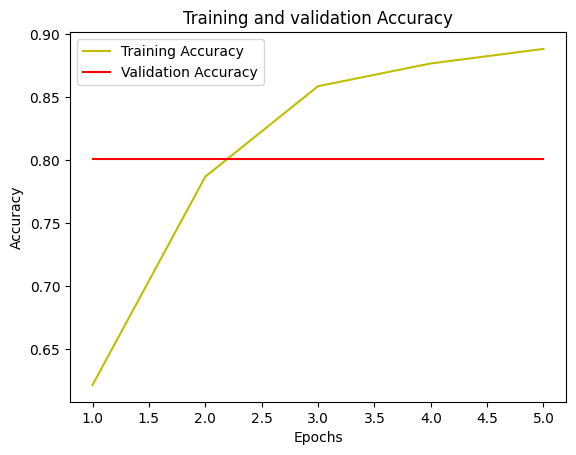

In [ ]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

        #Load previously saved model
from keras.models import load_model
model = load_model("./saved_models/unet.hdf5", compile=False)

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 4s 4s/step


In [ ]:
y_pred.shape

(6, 256, 256, 2)

In [ ]:
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

(6, 256, 256)

In [ ]:
# #Using built in keras function
# from keras.metrics import MeanIoU
# n_classes = 1
# IOU_keras = MeanIoU(num_classes=n_classes)  
# IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
# print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
# #To calculate I0U for each class...
# values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
# print(values)
# class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
# class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
# class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
# class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

# print("IoU for class1 is: ", class1_IoU)
# print("IoU for class2 is: ", class2_IoU)
# print("IoU for class3 is: ", class3_IoU)
# print("IoU for class4 is: ", class4_IoU)



1/1 [==============================] - 1s 706ms/step


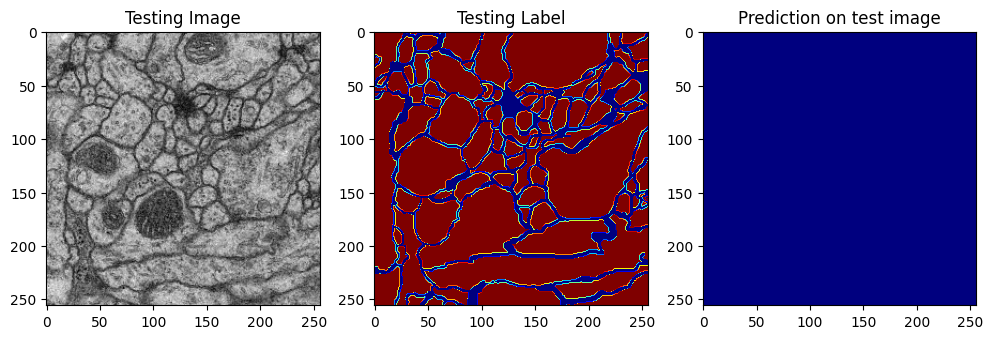

In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')
import random
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()